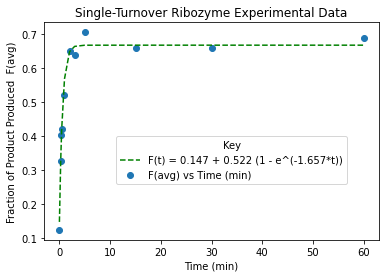

In [5]:
import numpy as np
from scipy.optimize import curve_fit   # Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
import matplotlib.pyplot as plt

# F(x) = Fo + Fsat(1-e^(-k*t))
def funct(x, a, b, c):
    return a + b * (1 - np.exp(-c * x))                                                     # a=Fo, b=F.sat, c=k.obs

#Plotting data
xdata = np.array([0, 0.25, 0.3, 0.45, 1, 2, 3, 5, 15, 30, 60])                                  # Time (min)
ydata = np.array([0.1233, 0.3266, 0.4033, 0.42, 0.52, 0.65, 0.64, 0.7066, 0.66, 0.66, 0.69])    # Fraction of product produced (Fp(avg))

# Finds trendline from custom equation
popt, pcov = curve_fit(funct,  xdata,  ydata)

# Generates the figure
plt.figure()
plt.title("Single-Turnover Ribozyme Experimental Data")
plt.xlabel("Time (min)")
plt.ylabel("Fraction of Product Produced  F(avg)")
plt.scatter(xdata,ydata, label='F(avg) vs Time (min)')
plt.plot(xdata, funct(xdata, *popt), 'g--', label='F(t) = %5.3f + %5.3f (1 - e^(-%5.3f*t))' % tuple(popt))
plt.legend(loc="upper left", bbox_to_anchor=(0.2,0.5), title="Key")

# Saves Figure as a file
plt.savefig("single_turnover.jpg", dpi=600, bbox_inches="tight")